# Aim of the Exercise:
1. Cleaning data-Check for missing values in dataset
2. Data Visualization
3. To analyze data and study correlation and trends between different features of the dataset.
4. Discarding or incorporating new features in dataset
5. Finding best algorithm for predictive modelling

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['indian_liver_patient.csv']


# Reading the data

In [2]:
data=pd.read_csv('../input/indian_liver_patient.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Checking for the null or missing values in data

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Since *Albumin_and_Globulin_Ratio* contains 4 null values,they either could be discarded or filled with suitable values. We are going to fill our values with mean of the column.

In [12]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

# Statistical Parameters of the dataset

In [18]:
data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [19]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Data Visualization
We will try to draw folowing insights from the dataset:
    1. How gender and age impacts the disease?
    2. Is there any direct relation between 'Total_Bilirubin' ,'Direct_Bilirubin',
       'Alkaline_Phosphotase' , 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'*
    

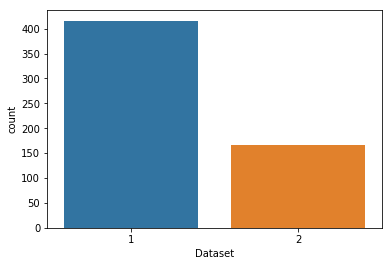

In [24]:
sns.countplot(label='count',x='Dataset',data=data);

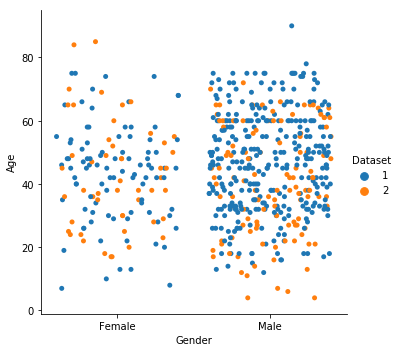

In [41]:
sns.catplot(data=data,y='Age',x='Gender',hue='Dataset',jitter=0.4);

To me some features seem linearly correlated like Total_Bilirubin and Direct_Bilirubin, Aspartate_Aminotransferase and Alamine_Aminotransferase, Total_Protiens and Albumin.Going to perform jointplot for each of them.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


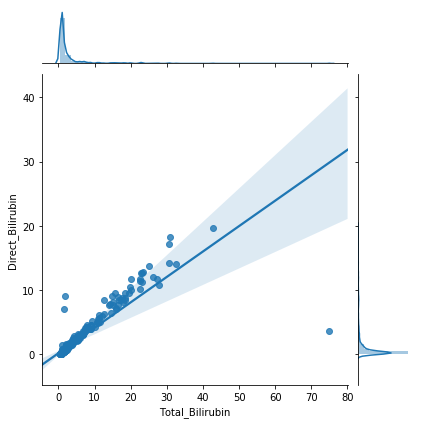

In [43]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind="reg")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


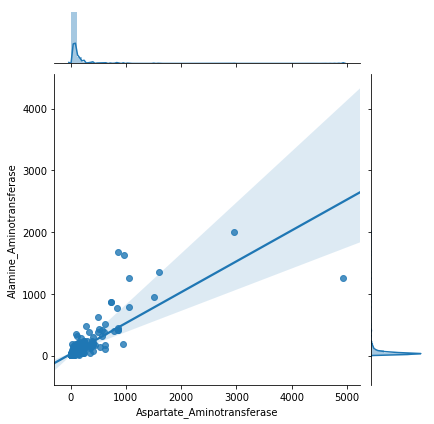

In [45]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=data, kind="reg")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


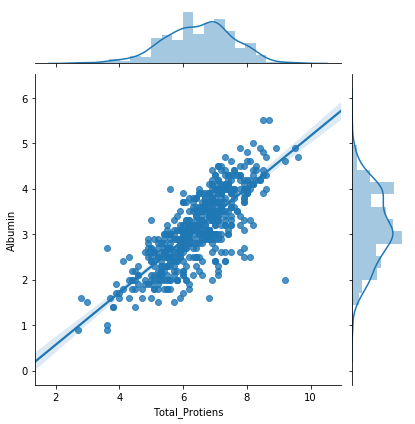

In [47]:
sns.jointplot("Total_Protiens", "Albumin", data=data, kind="reg")

Since there seems a direct relationship between them ,so during features selection we can keep one feature from each of them.

In [50]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


# Results of Analysis:
1. Age and Gender affect the occurence of  disease.
2. Some features are directly correlated like Total_Bilirubin and Direct_Bilirubin, Aspartate_Aminotransferase and Alamine_Aminotransferase, Total_Protiens and Albumin.
3. Male has more the no of liver disease than female.

# Feature Selection
I am discarding Direct_Bilirubin,Aspartate_Aminotransferase.
Features Kept:
Total_Bilirubin
Alamine_Aminotransferase
Total_Protiens
Albumin_and_Globulin_Ratio
Albumin

Since gender is categorical we need to convert it to numeric data.

In [56]:
data = pd.concat([data,pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)

In [61]:
X = data.drop(['Gender','Dataset','Direct_Bilirubin','Aspartate_Aminotransferase'], axis=1)
y = data['Dataset']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Model Predicting:
I plan to train my model on different algorithms and check for best from them on basis of confusion matrix , accuracy etc.
1. Logistic Regression
2. SVM
3. Random Forests
4. Linear Regression

# Logistic Regression

In [64]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
logispredicted=logistic.predict(X_test)
print('Training Score:',logistic.score(X_train, y_train))
print('Testing Score:',logistic.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,logispredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,logispredicted))

Training Score: 0.7410256410256411
Testing Score: 0.6632124352331606
Accuracy: 0.6632124352331606
Confusion Matrix: 
 [[116  18]
 [ 47  12]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM


In [68]:
svmclf = svm.SVC(gamma='scale')
svmclf.fit(X_train,y_train)
svmpredicted=logistic.predict(X_test)
print('Training Score:',svmclf.score(X_train, y_train))
print('Testing Score:',svmclf.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,svmpredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,svmpredicted))

Training Score: 0.7230769230769231
Testing Score: 0.694300518134715
Accuracy: 0.6632124352331606
Confusion Matrix: 
 [[116  18]
 [ 47  12]]


# Random Forest

In [65]:
# Random Forest

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
#Predict Output
predicted = randomforest.predict(X_test)

print('Training Score:',randomforest.score(X_train, y_train))
print('Testing Score:',randomforest.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))

Training Score: 1.0
Testing Score: 0.7046632124352331
Accuracy: 0.7046632124352331
Confusion Matrix: 
 [[116  18]
 [ 39  20]]


# Linear regression

In [70]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
#Predict Output
lpredicted = linear.predict(X_test)

print('Training Score:',linear.score(X_train, y_train))
print('Testing Score:',linear.score(X_test, y_test))


Training Score: 0.12045490714730023
Testing Score: 0.08672220047572055


In [71]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'SVM','Random Forest','Linear Regression'],
    'Score': [ logistic.score(X_train, y_train), svmclf.score(X_train, y_train), randomforest.score(X_train, y_train),linear.score(X_train, y_train)],
    'Test Score': [ logistic.score(X_test, y_test), svmclf.score(X_test, y_test), randomforest.score(X_test, y_test),linear.score(X_test, y_test)]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,1.000000,0.704663
1,SVM,0.723077,0.694301
0,Logistic Regression,0.741026,0.663212
3,Linear Regression,0.120455,0.086722
